# 01 kNN基础

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 实现kNN
## 创建简单数据用例

In [4]:
raw_data_X = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343808831, 3.368360954],
              [3.582294042, 4.679179110],
              [2.280362439, 2.866990263],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792783481, 3.424088941],
              [7.939820817, 0.791637231]
             ]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [9]:
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)

In [10]:
X_train

array([[3.39353321, 2.33127338],
       [3.11007348, 1.78153964],
       [1.34380883, 3.36836095],
       [3.58229404, 4.67917911],
       [2.28036244, 2.86699026],
       [7.42343694, 4.69652288],
       [5.745052  , 3.5339898 ],
       [9.17216862, 2.51110105],
       [7.79278348, 3.42408894],
       [7.93982082, 0.79163723]])

In [11]:
y_train

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

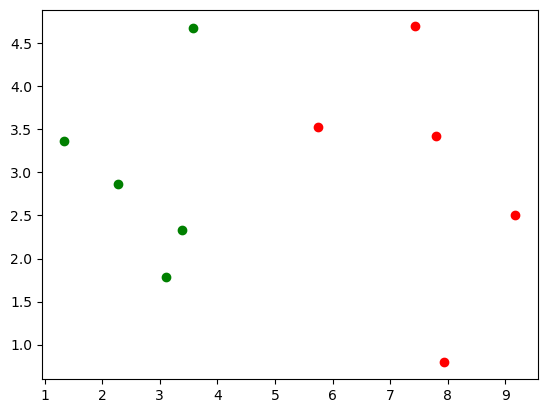

In [13]:
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0,1], color='g')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], color='r')
plt.show()

预测:

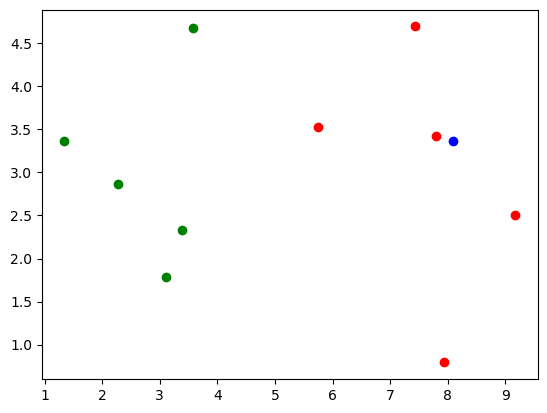

In [14]:
x = np.array([8.093607318, 3.365731514])

plt.scatter(X_train[y_train==0, 0], X_train[y_train==0,1], color='g')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], color='r')
plt.scatter(x[0], x[1], color='b')
plt.show()

## kNN过程

In [16]:
from math import sqrt
distances = []
for x_train in X_train:
    # for each x_train calculate (x_i - x)^2
    d = sqrt(np.sum((x_train - x)**2))
    distances.append(d)

In [17]:
distances

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

In [18]:
# python 写法
distances = [sqrt(np.sum((x_train - x)**2)) for x_train in X_train]
distances

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

In [20]:
# 按照数值大小对索引进行排序
nearst = np.argsort(distances)
nearst

array([8, 7, 5, 6, 9, 3, 0, 1, 4, 2], dtype=int64)

In [21]:
k = 6
topK_y = [y_train[neighbor] for neighbor in nearst[:k]]
topK_y

[1, 1, 1, 1, 1, 0]

In [24]:
from collections import Counter
votes = Counter(topK_y)
votes

Counter({1: 5, 0: 1})

In [25]:
votes.most_common(1)

[(1, 5)]

In [28]:
predict_y = votes.most_common(1)[0][0]
predict_y

1